## <strong> 과제 6: 프랙털 시각화 </strong>
---
<strong>프랙털</strong>(fractal)은 수학, 기하학 연구 분야 중 하나로서, <strong>자기유사성</strong>을 갖는 기하학적 구조를 말합니다. 쉽게 말하면 어떤 도형의 작은 일부를 확대해 봤을 때 그 도형의 전체 모습이 똑같이 반복되는 특징을 가집니다. 프랙털 구조는 간단한 수학적 규칙이 반복 적용됨으로써 생성되며, 나무의 구조와 해안선의 모양과 같이 자연에서도 다양한 프랙털 패턴들이 발견됩니다.

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a4/Mandelbrot_sequence_new.gif" width="200" height="200" alt=''>

본 예제 코드에서 NumPy 유니버설 함수 관련 코드를 완성하여  간단한 프랙털 구조를 시각화하세요.
+ 출처: NumPy 공식 웹사이트
+ 유의사항: 본 과제는 프랙털 이론과 시각화 방법을 배우는 것이 목적이 아니므로, NumPy 유니버설 함수를 사용하는 부분을 제외한 나머지 코드는 완성된 형태로 제공됩니다👽.  

<strong> 필요한 라이브러리 </strong>
+ ```numpy```: 다차원 배열 연산
+ ```matplolib```: 시각화
+ ```mpl_toolkits.axes_grid1```: ```matplotlib``` figure의 축 레이블 옵션

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.axes_grid1 import make_axes_locatable

<strong> 시각화 설정 코드 </strong> : 별도의 윈도우 창에서 시각화 결과를 출력하는 코드이며, 시각화 결과가 제대로 출력되지 않는 경우에는 ```%matplotlib qt5``` 코드를 삭제하고 커널을 재시작(Kernel-Restart Kernel)하기 바랍니다.

In [ ]:
%matplotlib qt5
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

### <strong> 간단한 복소수 함수 살펴보기 </strong>
---
프랙털 구조를 만들기 위한 방법 중에 하나는 복소수와 간단한 수학적 규칙을 반복 적용하는 것입니다(예: 만델브로 집합).  
다음은 간단한 복소수를 포함한 함수를 나타냅니다.

${f(z)=z^2-1}$  
+ ${z}$: ${a+bi}$ 형태의 복소수($a$는 실수부, $bi$는 허수부)

위의 함수를 구현하기 위해 ${z}$를 입력받아 제곱을 구한 뒤 1을 뺄샘하는 Python 함수 ```f(z)```를 구현하세요.
+ 참고: 제곱을 구하는 <strong>유니버설 함수</strong>를 사용하세요.

In [2]:
# [+] 함수 구현
def f(z):
    return ...

In [3]:
# 함수 테스트
f(0)

-1

 위의 함수 ```f(z)```에서 유니버설 함수를 사용하므로, 산술 연산을 벡터화된 방식으로 빠르게 수행합니다. 다음 세 개의 복소수(```4, 1-0.2j, 1.6```)를 입력으로 해서 함수를 호출하세요.
 + Python에서는 복소수의 허수부를 ```0.2j```와 같이 ```i```가 아닌 ```j```를 이용하여 표현합니다.
 + 복소수는 실수를 포함하는 가장 큰 수 체계이므로 ```4```와 ```1.6``` 모두 복소수입니다(각각 ```4.0+0.j, 1.6+0.j```와 같이 나타낼 수 있습니다).

In [4]:
z = [4, 1-0.2j, 1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])

위의 결과를 요약하면,
+ ${4 \rightarrow 15}$: 값이 증가
+ ${1-0.2i \rightarrow -0.04-0.4i}$: 값이 감소
+ ${1.6 \rightarrow 1.56}$: 값의 변화가 적음  

와 같습니다. 이는 허수가 가지는 성질(${i^2=-1}$)로 인해 단순 연산을 동일하게 적용해도 결과의 양상이 다르고 예측이 어려운 측면(즉, 카오스적인 성질)을 보여줍니다.

### <strong> 더 많은 복소수 집합에 대한 함수의 동작 확인하기 </strong>
---
더 많은 데이터에 대한 함수의 동작을 확인하기 위해, 복소수 집합을 생성하고 이를 실수축(real axis)과 허수축(imaginary axis)으로 구성되는 복소 평면에 시각화 할 수 있습니다.
데이터를 선형 간격으로 생성하는 linspace() 유니버설 함수를 이용하여 x축과 y축에 해당되는 값 집합을 각각 생성하는 코드를 작성하세요  

두 집합 모두 -10에서 10 사이에서 균일한 간격을 가지는 20개의 값으로 구성됨
생성된 집합에 ```meshgrid()```함수를 적용하면 집합 간에 Cartesian Product가 수행되어 2차원 점 집합이 생성됩니다.됩니다.

In [5]:
# [+] np.linspace()를 이용하여 x축, y축 값 집합을 생성
x, y = np.meshgrid(np.linspace(...), np.linspace(...))

생성된 집합의 ```y``` 값에 허수 ```1j```를 곱셈하고 ```x```를 더해서 복소수 집합인 ```mesh```를 구하세요.  
결과적으로 ```mesh```의 각 데이터는 복소수로서 복소평면에 대응됩니다(```x```가 실수축, ```y```가 허수축).

In [6]:
# [+] 복소수 집합(mesh)으로 변환하기
mesh = ...

함수 ```f(z)```는 복소수 집합(```mesh```)을 입력받아 원소 단위로 ${z^2-1}$ 연산을 수행합니다. 다음으로 함수의 결과를 시각화하기 위해서는 복소수의 절대값을 구해야 합니다.  
이를 위해 반환받은 함수값 집합에 유니버설 함수를 적용하여 절대값(absolute value) 집합을 구한 뒤 이를 ```output``` 객체에 할당하세요.
+ 힌트: 절대값을 구하는 유니버설 함수 찾아보기

In [7]:
# [+] 함수 계산 결과의 절대값 구하기
output = ...(f(mesh))

다음은 함수를 한 번 적용했을 때의 결과 ```output```을 3차원 산점도로 시각화하는 코드입니다. 시각화 옵션을 설정하는 코드는 중요하지 않으니 가볍게 참고하세요.

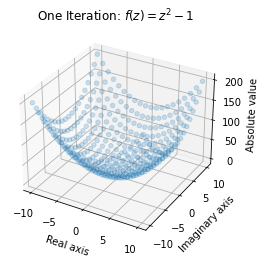

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')      # 실수부
ax.set_ylabel('Imaginary axis') # 허수부
ax.set_zlabel('Absolute value') # 함수값의 절대값
ax.set_title('One Iteration: $f(z) = z^2 - 1$');


위와 같이 한 번의 함수 연산을 통해 얻어진 결과에서는 특정 영역(특히 가장 가까운 영역에서 
)의 값들은 다소 작게 유지되는 반면에, 다른 영역의 값들은 상당히 커집니다.

아래와 같이 ```mesh```에 두 번의 함수 반복을 수행하는 코드를 실행하고 어떤 결과가 나오는지 살펴보세요.

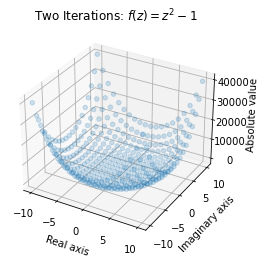

In [9]:
output = np.abs(f(f(mesh)))

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

다시 한 번, 원점 주변의 값은 작게 유지되고 원점에서 먼 값은 더 크게 "<strong>폭발</strong>(=발산, divergence)"하는 것을 볼 수 있습니다.  
언뜻 보기에 프랙탈의 동작은 정상적으로 보이며 심지어 평범해 보일 수도 있지만, 실제로는 눈에 보이는 것보다 더 복잡하며, 더 많은 반복을 적용하기 시작하면 예상 밖의 현상을 볼 수 있습니다.



### <strong>유사한 복소수 집합에 대해 함수 반복 적용하기</strong>
---
다음은 값이 유사한 세 개의 복소수들을 나타냅니다.

${z_1=0.4+0.4i,}$

${z_2=z_1+0.01,}$

${z_3=z_1+0.01i}$

앞서 시각화한 두 개의 결과를 종합하면, 함수를 반복적으로 적용하면 이러한 값이 원점 근처에 유지될 것으로 예상할 수 있습니다. 각 값에 대해 함수를 10회 반복 적용하면 어떤 결과가 나타나는지 살펴보겠습니다:

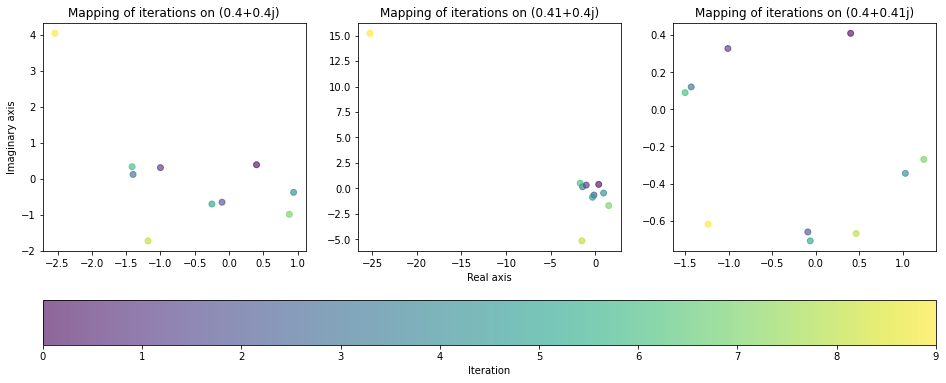

In [10]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros(
    (num_iter+1, selected_values.shape[0]),  # 10X3 Zero 배열 생성
    dtype=complex  # 데이터 타입: 복소수
)
outputs[0] = selected_values   # 함수 초기 조건

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # 10번 함수 반복하는 동안 각 결과를 저장

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(
        data.real,  # 실수부
        data.imag,  # 허수부
        c=range(data.shape[0]), 
        alpha=0.6
    )
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration');

시각화 결과를 통해 반복 횟수가 증가할수록 함수의 동작은 예상과는 다르다는 것을 알 수 있습니다. 이것은 프랙털의 혼란스러운 동작의 예를 보여줍니다. 

처음 두 개의 복소수(${z_1,z_2}$)의 경우, 마지막 반복(노란색 점)에서 값이 "<strong>폭발</strong>"하여 원점 근처에 영역에서 크게 벗어난 결과를 나타냅니다. 반면에 마지막 복소수(${z_3}$)의 경우, 원점에 가까운 작은 영역에 국한된 상태로 유지되는 것을 보여줍니다. 세 개의 복소수간의 차이가 매우 작음에도 불구하고 완전히 다른 동작을 보입니다.

그렇다면, 값이 발산하기('폭발')전에 각 값에 몇 번의 반복을 적용할 수 있을까요?

처음 두 개의 결과(${z_1, z_2}$)에서 보았듯이 값이 원점에서 멀어질수록 일반적으로 더 빠르게 폭발했습니다. 이를 통해 값이 원점으로부터 일정 거리(예: 2)를 초과하면 값이 곧 발산할 운명이라고 가정할 수 있으며, 이 임계값을 반경(radius)이라고 정의합니다.

이를 통해 많은 계산을 수행하지 않으면서, 특정 값에 대한 함수의 동작을 정량화할 수 있습니다. 예를 들면, 반경을 초과하면 반복을 중지할 수 있으며, 발산 전에 얼마나 많은 반복이 적용되었는지 집계하면 다른 방법으로는 추적하기 어려운 함수의 동작에 대한 인사이트를 얻을 수 있습니다.

### <strong> 발산 전까지 함수 반복 적용 및 시각화
---
다음의 함수 ```divergence_rate```는 ```mesh```의 각 복소수 값에 대해 함수 수행을 반복하고 값이 발산하기 전에 반복 횟수를 집계하는 코드입니다.

다음의 절차를 수행하는 코드를 완성해서 값 별 발산 전 반복횟수를 구하세요.
1. 마스킹 연산을 이용하여 복소수 집합(```z```)내의 개별 복소수의 절대값이 반경(```radius```)보다 작을 경우, ```True``` 값을 가지는 Boolean 배열 마스크(```conv_mask```)을 생성
    + 참고: 절대값이 반경보다 작은 값들은 아직 발산되지 않은 값들이다.
2. 생성된 마스크(```conv_mask```)에서 ```True``` 에 해당되는 ```diverge_len``` 배열의 값들을 선택해서 이들의 반복 횟수(```diverge_len```)를 1 증가.
3. 마스크에서 ```True``` 에 해당되는 복소수 집합(```z```) 내의 값들을 선택하여 함수를 한 번 더 적용하고 그 결과를 ```z```에 다시 저장

In [11]:
def divergence_rate(mesh, num_iter=10, radius=2):

    z = mesh.copy()
    # 값 별 반복 횟수를 저장
    diverge_len = np.zeros(mesh.shape)

    # 발산되지 않은 값들에 대해 함수를 반복 적용
    for i in range(num_iter):
        # [+] 1. Boolean 배열  마스크 생성
        ...

        # [+] 2. 해당 값들에 대한 diverge_len 값 증가
        ...

        # [+] 3. 해당 값들에 대해 함수 적용
        ...

    return diverge_len

위에서 함수를 정의했으니, 마지막으로 초기에 주어지는 복소수 집합 ```mesh```를 다시 생성해야합니다.  
```linspace()```를 이용하여, ${[-2, 2]}$범위의 균일한 400개의 값으로 이루어진 배열을 두 개 생성하세요.  
나머지 코드는 두 배열로부터 ```mesh```를 생성하고, 이를 인자로 해서 ```divergence_rate```함수를 호출하고 반환받은 ```diverge_len```을 2D 이미지로 시각화하는 부분입니다(역시나 시각화 부분은 무시하셔도 됩니다😎).

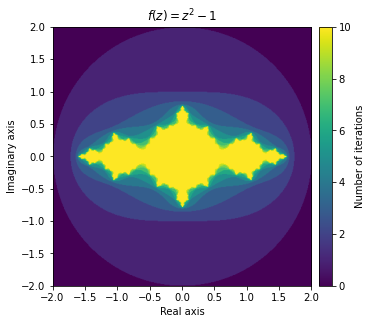

In [12]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');

최종 시각화 결과는 복소수에 대한 함수 동작의 복잡성을 잘 보여줍니다.  

<strong>노란색</strong>에 가까운 영역은 반복 횟수가 큰(즉, 발산이 잘 되지 않고 작은 영역에 점들이 수렴하는 경향을 보이는) 값들을 나타내고, <strong>보라색</strong>에 가까운 영역은 반복 횟수가 작은(발산이 쉽게 되는) 값들을 나타냅니다. 

수렴하는 값과 발산하는 값의 경계에서 발생하는 아름다운 패턴은 결국 프랙털 구조이며, 이것이 단순한 함수에서 만들어졌다는 사실이 신기합니다. 😊